# 4. Exploring a dictionary-based approach with Empath

Empath (see [Fast et al., 2016](https://dl.acm.org/doi/10.1145/2858036.2858535)) is a tool for analysing a given corpus of text to identify the occurrence of certain pre-defined linguistic categories (similar to what is provided by LIWC), but also provides us with a way to create our own linguistic categories based on the behaviour we might want to examine.

Empath does not come pre-installed with standard python distributions so you would need to install it on your system using the following command in your terminal:

````
pip install empath
````

In [1]:
import pandas as pd
from empath import Empath
lexicon = Empath()

In [2]:
reviews_df = pd.read_json('data/json/amazon_reviews.json', lines=True, encoding='utf-8') # to prevent error due to
reviews_df.sample(3)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
10241,en_0807374,product_en_0604183,reviewer_en_0258752,1,I absolutely do not like these socks. The will...,One Star,en,apparel
73717,en_0862049,product_en_0886212,reviewer_en_0886594,2,It's personally too small for me. The clitoral...,Strong but small,en,drugstore
16739,en_0645633,product_en_0534417,reviewer_en_0487580,1,Didn't work as described and a waste of money,Didn't work,en,lawn_and_garden


In [3]:
camera_reviews_df = reviews_df[reviews_df['product_category'] == 'camera']
camera_reviews = list(camera_reviews_df['review_body'])

## Get the list of categories from Empath
Empath has a set of predefined categories that you can print by using the following command.

In [4]:
lexicon.cats.keys()

dict_keys(['help', 'office', 'dance', 'money', 'wedding', 'domestic_work', 'sleep', 'medical_emergency', 'cold', 'hate', 'cheerfulness', 'aggression', 'occupation', 'envy', 'anticipation', 'family', 'vacation', 'crime', 'attractive', 'masculine', 'prison', 'health', 'pride', 'dispute', 'nervousness', 'government', 'weakness', 'horror', 'swearing_terms', 'leisure', 'suffering', 'royalty', 'wealthy', 'tourism', 'furniture', 'school', 'magic', 'beach', 'journalism', 'morning', 'banking', 'social_media', 'exercise', 'night', 'kill', 'blue_collar_job', 'art', 'ridicule', 'play', 'computer', 'college', 'optimism', 'stealing', 'real_estate', 'home', 'divine', 'sexual', 'fear', 'irritability', 'superhero', 'business', 'driving', 'pet', 'childish', 'cooking', 'exasperation', 'religion', 'hipster', 'internet', 'surprise', 'reading', 'worship', 'leader', 'independence', 'movement', 'body', 'noise', 'eating', 'medieval', 'zest', 'confusion', 'water', 'sports', 'death', 'healing', 'legend', 'heroic

To understand what words make up a category from the list above, e.g., `help` or `office` or `positive_emotion`, use the following command.

In [5]:
print(lexicon.cats['positive_emotion'])

['faith', 'glad', 'loyalty', 'sympathize', 'dearly', 'elation', 'adoration', 'wish', 'rejoice', 'alive', 'determination', 'bond', 'gratitude', 'better', 'respect', 'kindness', 'empathy', 'family', 'love', 'enthusiasm', 'assurance', 'cherish', 'hope', 'overjoyed', 'friend', 'concern', 'convince', 'sincere', 'enlighten', 'triumph', 'reason', 'closure', 'thrill', 'reassurance', 'feeling', 'happy', 'forgiveness', 'keep', 'trustworthy', 'great', 'eagerness', 'joy', 'confidence', 'surprise', 'trust', 'honesty', 'honestly', 'forgiving', 'bravery', 'optimism', 'sincerity', 'loved', 'honest', 'thrilled', 'unconditionally', 'reunite', 'trusting', 'curiosity', 'excitement', 'understanding', 'accomplishment', 'pride', 'joyful', 'admiration', 'happiness', 'compassion', 'certainty', 'care', 'emotion', 'freedom', 'comfort', 'willingness', 'affection', 'genuine', 'proud']


## Analysing a piece of text using Empath
Let's say you want to see if a text uses a higher density of `positive_emotion` words (i.e, the number of 'positive emotion' words divided by the total words in the review) than another text. For that matter, we just want to see what the `positive_emotion` scores are across all the reviews. We can use the following approach.

In [6]:
posemo_scores = []
for review in camera_reviews :
    posemo = lexicon.analyze(camera_reviews[0], categories=["positive_emotion"], normalize=True)
    posemo_score = posemo['positive_emotion']
    posemo_scores.append(posemo_score)


We can create a function for this approach so that we can pass this function to the dataframe.

In [7]:
def calc_posemo_score(text):
    category = 'positive_emotion'
    score = lexicon.analyze(text, categories=[category], normalize=True)
    return score[category]

camera_reviews_df['positive_emotion'] = camera_reviews_df['review_body'].apply(calc_posemo_score)
                                                                
# df["sentence_length2"] = df["sentences"].apply(sentence_length)
camera_reviews_df.sample(3)                                                                               

/var/folders/ln/6_4g7p550z11mh7_mr7mdv0hfms8jw/T/ipykernel_16651/667321627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  camera_reviews_df['positive_emotion'] = camera_reviews_df['review_body'].apply(calc_posemo_score)


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,positive_emotion
110401,en_0414643,product_en_0050277,reviewer_en_0273750,3,I decided not to use them as I don't want to a...,Three Stars,en,camera,0.0
112752,en_0620896,product_en_0579489,reviewer_en_0261700,3,I watched some reviews. Maybe I have to break ...,Good for what it is. Very small.,en,camera,0.0
91248,en_0073283,product_en_0734389,reviewer_en_0989938,3,"When the camera was working, it was a beautifu...",Wouldn't work where I needed,en,camera,0.0


We can then plot a histogram of the scores to see their distribution.

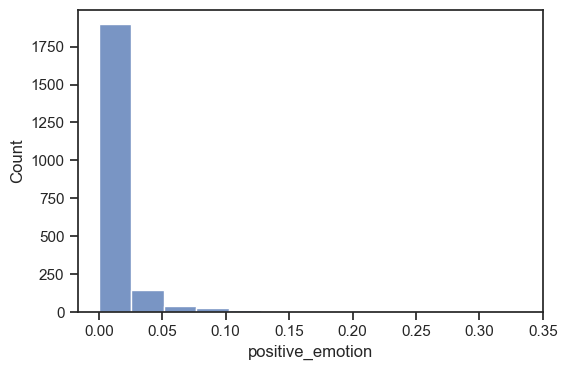

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme('notebook')
sns.set_style('ticks')
plt.figure(dpi=100)

g = sns.histplot(x='positive_emotion', data=camera_reviews_df)

You can do the same thing for the Empath category `negative_emotions`.

In [9]:
def calc_negemo_score(text):
    category = 'negative_emotion'
    score = lexicon.analyze(text, categories=[category], normalize=True)
    return score[category]

camera_reviews_df['negative_emotion'] = camera_reviews_df['review_body'].apply(calc_negemo_score)
                                                                
g = camera_reviews_df.sample(3)                                                                               

/var/folders/ln/6_4g7p550z11mh7_mr7mdv0hfms8jw/T/ipykernel_16651/1793845387.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  camera_reviews_df['negative_emotion'] = camera_reviews_df['review_body'].apply(calc_negemo_score)


<AxesSubplot:xlabel='negative_emotion', ylabel='Count'>

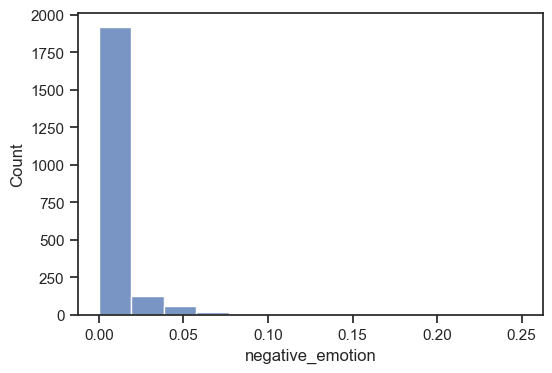

In [10]:
plt.figure(dpi=100)
sns.histplot(x='negative_emotion', data=camera_reviews_df)


In [11]:
emotions_df = camera_reviews_df[(camera_reviews_df['positive_emotion'] > 0) | (camera_reviews_df['negative_emotion'] > 0)]
emotions_df.shape

(756, 10)

Do you think the use of positive emotion-related text is more for higher-rated products? Let's see.

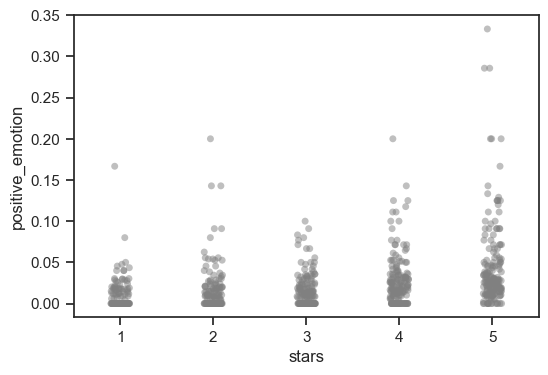

In [12]:
plt.figure(dpi=100)
g = sns.stripplot(y='positive_emotion', x='stars', data=emotions_df, jitter=True, color='gray', alpha=0.5)

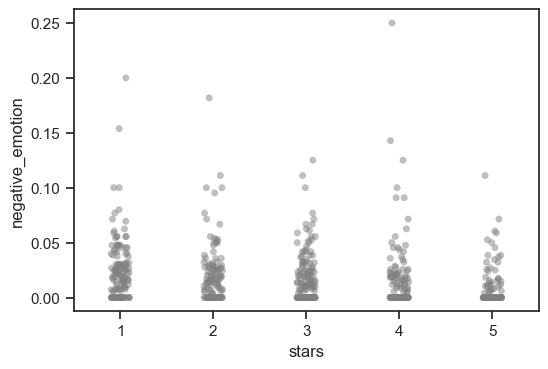

In [13]:
plt.figure(dpi=100)
g = sns.stripplot(y='negative_emotion', x='stars', data=emotions_df, jitter=True, color='gray', alpha=0.5)


## Exercise
What is the explanation for the anomalies? Use techniques covered so far to identify.

**HINT:** Filter the dataframe by score range, then examine the text.

Exercise: Identify positive emotion-related words from five-star reviews for your product. Create a new empath category using seed words from those reviews.

**Bonus:** Identify the most frequently-occurring positive and negative-emotion words in the reviews. 